In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time

In [2]:
df = pd.read_csv('../data/clean_data/clean_data.csv')

df.head()

,duration_ms,loudness,tempo,valence,acousticness,danceability,energy
0,0.403695,0.451467,0.178779,0.963,0.732,0.819,0.341
1,0.483304,0.557378,0.412301,0.165,0.967,0.275,0.309
2,0.366304,0.530943,0.421576,0.253,0.957,0.418,0.193
3,0.983312,0.449265,0.529827,0.196,0.579,0.697,0.346
4,0.346890,0.514234,0.210284,0.406,0.996,0.518,0.203


# KMeans algo

In [3]:
from sklearn.cluster import KMeans

In [4]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(k)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

len(inertias)

10

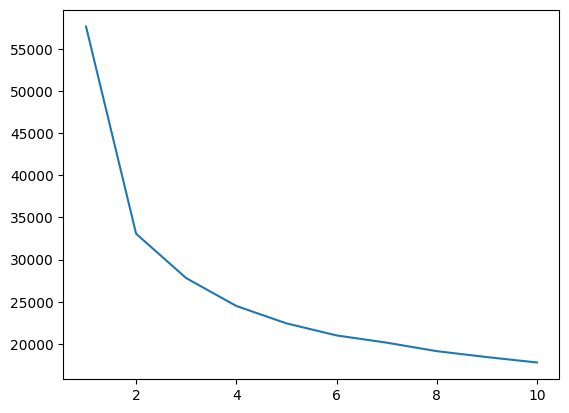

In [5]:
sns.lineplot(x=list(range(1, 11)), y=inertias);

<font color='red'>The optimal number of clusters appears to be 4</font>

## Loop for best KMeans solution

### K-means++ initialization

In [6]:
best_solution = None
time_partials = []
scores = []

start_total_time = time.time()
for _ in range(1000):
    start_partial_time = time.time()
    kmeans = KMeans(4, init='k-means++')
    kmeans.fit(df)
    partial_time = time.time() - start_partial_time
    time_partials.append(partial_time)
    scores.append(kmeans.inertia_)

    if best_solution is None or kmeans.inertia_ < best_solution.inertia_:
        best_solution = kmeans

total_time = time.time() - start_total_time

In [7]:
print(f'Best inertia: {best_solution.inertia_:.2f}')
print(f'Average inertia: {np.mean(scores):.2f}')
print(f'Std inertia: {np.std(scores):.2f}')
print('-'*50)
print(f'Total time:     {total_time:.2f} seconds.')
print(f'Average time per loop:    {np.mean(time_partials):.2f} seconds.')
print(f'Std time per loop:    {np.std(time_partials):.2f} seconds.')

Best inertia: 24506.47
Average inertia: 24509.19
Std inertia: 75.53
--------------------------------------------------
Total time:     123.37 seconds.
Average time per loop:    0.12 seconds.
Std time per loop:    0.01 seconds.


In [8]:
df_kmeans_pp = df.copy()

df_kmeans_pp['labels'] = best_solution.predict(df_kmeans_pp)

In [9]:
df_kmeans_pp.labels.value_counts(normalize=True)

labels
3    0.272957
2    0.260679
0    0.241534
1    0.224830
Name: proportion, dtype: float64

In [10]:
best_solution.cluster_centers_

array([[0.48162876, 0.33947813, 0.43684693, 0.27480582, 0.86042965,
        0.41169569, 0.20613995],
       [0.56959432, 0.61067404, 0.55554865, 0.36672681, 0.12709222,
        0.51196457, 0.6774682 ],
       [0.40133901, 0.46613673, 0.51733348, 0.70921742, 0.79011807,
        0.60263753, 0.3849315 ],
       [0.50715091, 0.59018491, 0.53617861, 0.77237975, 0.17280491,
        0.66384292, 0.68707977]])

### Random initialization

In [11]:
best_solution = None
time_partials = []
scores = []

start_total_time = time.time()
for _ in range(1000):
    start_partial_time = time.time()
    kmeans = KMeans(4, init='random')
    kmeans.fit(df)
    partial_time = time.time() - start_partial_time
    time_partials.append(partial_time)
    scores.append(kmeans.inertia_)

    if best_solution is None or kmeans.inertia_ < best_solution.inertia_:
        best_solution = kmeans

total_time = time.time() - start_total_time

In [16]:
print(f'Best inertia: {best_solution.inertia_:.2f}')
print(f'Average inertia: {np.mean(scores):.2f}')
print(f'Std inertia: {np.std(scores):.2f}')
print('-'*50)
print(f'Total time:     {total_time:.2f} seconds.')
print(f'Average time per loop:    {np.mean(time_partials):.2f} seconds.')
print(f'Std time per loop:    {np.std(time_partials):.2f} seconds.')

Best inertia: 24506.49
Average inertia: 24506.65
Std inertia: 0.06
--------------------------------------------------
Total time:     159.35 seconds.
Average time per loop:    0.16 seconds.
Std time per loop:    0.02 seconds.


In [13]:
df_kmeans_random = df.copy()

df_kmeans_random['labels'] = best_solution.predict(df_kmeans_random)

In [14]:
df_kmeans_random.labels.value_counts(normalize=True)

labels
2    0.273792
1    0.260720
3    0.241294
0    0.224194
Name: proportion, dtype: float64

In [15]:
best_solution.cluster_centers_

array([[0.56963584, 0.61082713, 0.555771  , 0.36584737, 0.12706092,
        0.51138752, 0.67766974],
       [0.40113136, 0.46583429, 0.5171922 , 0.70892897, 0.7905971 ,
        0.6026118 , 0.38442627],
       [0.50735231, 0.59009801, 0.53607364, 0.77149481, 0.17298472,
        0.66368638, 0.68676241],
       [0.48186587, 0.33951385, 0.43685094, 0.2744073 , 0.86034499,
        0.41140199, 0.20619639]])